In [1]:
using Test
using OffsetArrays
using Plots
include("../src/ladderDGA_core.jl")
include("../src/build_chi_asympt.jl")
include("../test/test_functions.jl")

gen_synth (generic function with 1 method)

In [2]:
Nf = 2
Nb = 2
Nν_shell = 2
Nν_full = 2*Nf+2*Nν_shell

shift = 0
gi, χ₀, χsp, χch, χsp_a, χch_a, χpp_a, U, β, shift = 
    gen_synth(Nf, Nb, Nν_shell, shift)
I_core, I_corner, I_top, I_side = shell_indices(Nν_full, Nν_shell)
ωi = 3
n_iω = trunc(Int, size(χsp,3)/2)
n_iν = trunc(Int, Nν_full/2);

In [3]:
χsp[:,:,1]

8×8 Matrix{Float64}:
 1.0   9.0  17.0  25.0  33.0  41.0  49.0  57.0
 2.0  10.0  18.0  26.0  34.0  42.0  50.0  58.0
 3.0  11.0  19.0  27.0  35.0  43.0  51.0  59.0
 4.0  12.0  20.0  28.0  36.0  44.0  52.0  60.0
 5.0  13.0  21.0  29.0  37.0  45.0  53.0  61.0
 6.0  14.0  22.0  30.0  38.0  46.0  54.0  62.0
 7.0  15.0  23.0  31.0  39.0  47.0  55.0  63.0
 8.0  16.0  24.0  32.0  40.0  48.0  56.0  64.0

In [4]:
I_core, I_corner, I_t, I_r = shell_indices(Nν_full, Nν_shell)
I_all = sort(union(I_core, I_corner, I_r, I_t))
I_aympt = sort(union(I_corner, I_r,  I_t))

Fsp = zeros(eltype(χsp), Nν_full, Nν_full)
Fch = zeros(eltype(χsp), Nν_full, Nν_full)
λsp = Array{eltype(χsp), 1}(undef, Nν_full)
λch = similar(λsp)
ωi = 1
ω_off = shift*trunc(Int,(ωi-n_iω-1)/2)
ind1_list_corner, ind2_list_corner = aux_indices(I_corner, ωi, n_iω, n_iν, shift)
ind1_list_r, ind2_list_r = aux_indices(I_r, ωi, n_iω, n_iν, shift)
ind1_list_t, ind2_list_t = aux_indices(I_t, ωi, n_iω, n_iν, shift)

for i in I_all
    δ_ννp = Float64(i[1] == i[2])
    Fsp[i] = - β^2 * (χsp[i,ωi] - δ_ννp*χ₀[i[1],ωi])/(χ₀[i[1],ωi]*χ₀[i[2],ωi])
    println("$i : ($(χsp[i,ωi]) - $(δ_ννp) * $(χ₀[i[1],ωi]))/($(χ₀[i[1],ωi]) * $(χ₀[i[2],ωi]))" )
end
println("--------")
χsp_n = update_χ!(λsp, view(χsp,:,:,ωi), Fsp, view(χ₀,:,ωi), β, I_aympt)
#update_Fsp!(Fsp, λsp, χsp_n, χch_a, χsp_a, χpp_a, U, I_corner, I_r, I_t, ind1_list_corner, ind2_list_corner, 
#            ind1_list_r, ind2_list_r, ind1_list_t, ind2_list_t)

CartesianIndex(1, 1) : (1.0 - 1.0 * 100.0)/(100.0 * 100.0)
CartesianIndex(2, 1) : (2.0 - 0.0 * 200.0)/(200.0 * 100.0)
CartesianIndex(3, 1) : (3.0 - 0.0 * 300.0)/(300.0 * 100.0)
CartesianIndex(4, 1) : (4.0 - 0.0 * 400.0)/(400.0 * 100.0)
CartesianIndex(5, 1) : (5.0 - 0.0 * 500.0)/(500.0 * 100.0)
CartesianIndex(6, 1) : (6.0 - 0.0 * 600.0)/(600.0 * 100.0)
CartesianIndex(7, 1) : (7.0 - 0.0 * 700.0)/(700.0 * 100.0)
CartesianIndex(8, 1) : (8.0 - 0.0 * 800.0)/(800.0 * 100.0)
CartesianIndex(1, 2) : (9.0 - 0.0 * 100.0)/(100.0 * 200.0)
CartesianIndex(2, 2) : (10.0 - 1.0 * 200.0)/(200.0 * 200.0)
CartesianIndex(3, 2) : (11.0 - 0.0 * 300.0)/(300.0 * 200.0)
CartesianIndex(4, 2) : (12.0 - 0.0 * 400.0)/(400.0 * 200.0)
CartesianIndex(5, 2) : (13.0 - 0.0 * 500.0)/(500.0 * 200.0)
CartesianIndex(6, 2) : (14.0 - 0.0 * 600.0)/(600.0 * 200.0)
CartesianIndex(7, 2) : (15.0 - 0.0 * 700.0)/(700.0 * 200.0)
CartesianIndex(8, 2) : (16.0 - 0.0 * 800.0)/(800.0 * 200.0)
CartesianIndex(1, 3) : (17.0 - 0.0 * 100.0)/(100.

3510.0

In [5]:
χsp[:,:,1]

8×8 Matrix{Float64}:
  1.0  18.0  34.0  50.0  66.0  82.0   98.0  114.0
  4.0  10.0  36.0  52.0  68.0  84.0  100.0  116.0
  6.0  22.0  19.0  27.0  35.0  43.0  102.0  118.0
  8.0  24.0  20.0  28.0  36.0  44.0  104.0  120.0
 10.0  26.0  21.0  29.0  37.0  45.0  106.0  122.0
 12.0  28.0  22.0  30.0  38.0  46.0  108.0  124.0
 14.0  30.0  46.0  62.0  78.0  94.0   55.0  126.0
 16.0  32.0  48.0  64.0  80.0  96.0  112.0   64.0

In [6]:
update_Fsp!(Fsp, λsp, χsp_n, χch_a, χsp_a, χpp_a, U, I_corner, I_r, I_t, ind1_list_corner, ind2_list_corner, 
            ind1_list_r, ind2_list_r, ind1_list_t, ind2_list_t)
χsp_n = update_χ!(λsp, view(χsp,:,:,ωi), Fsp, view(χ₀,:,ωi), β, I_aympt)

-2.110729882e10

In [7]:
χsp[:,:,1]

8×8 Matrix{Float64}:
 -4.51857e7  -9.03468e7  -3.01854e7  …  -6.01865e7  -3.15852e8  -3.60893e8
 -9.03468e7  -1.80644e8  -6.03108e7     -1.20253e8  -6.3153e8   -7.21587e8
 -3.01854e7  -6.03108e7  19.0           43.0        -2.10038e8  -2.39803e8
 -4.02058e7  -8.03316e7  20.0           44.0        -2.7976e8   -3.20046e8
 -5.02062e7  -1.00312e8  21.0           45.0        -3.50043e8  -4.00449e8
 -6.01866e7  -1.20253e8  22.0        …  46.0        -4.20466e8  -4.81013e8
 -3.15852e8  -6.3153e8   -2.10038e8     -4.20466e8  -2.21076e9  -2.52714e9
 -3.60893e8  -7.21587e8  -2.39803e8     -4.81013e8  -2.52714e9  -2.88879e9

In [8]:
include("../test/test_s0.jl")

-0.00031345733272706184 + 3.1242629112869634e-13im, -0.0003663383213984029 + 1.1842633433985835e-12im
0.019088961524655664 + 3.3819747608283533e-13im, 0.02493049140144256 + 1.0817618572376097e-12im
-0.02552792222309233 + 3.6629619794808826e-13im, 0.09316584452695616 + 9.882517763715496e-13im
-0.07453450659753535 + 3.9659550410179703e-13im, 0.15473125847112307 + 9.022194015321039e-13im
-0.1274240677222139 + 4.2925528033938697e-13im, 0.21128391280927958 + 8.230965144899878e-13im
-0.1844766239941529 + 4.644541151707595e-13im, 0.26319185391890515 + 7.503462864689311e-13im
-0.24600801941086964 + 5.023841149968187e-13im, 0.31082184470979407 + 6.834731323440383e-13im
-0.3123580158324931 + 5.432517405633662e-13im, 0.35451170908229573 + 6.220193970215022e-13im
-0.3838917696352352 + 5.872788679253731e-13im, 0.39457320010416214 + 5.65562477096076e-13im
-0.46100170900248044 + 6.347039321104763e-13im, 0.43129397340757625 + 5.137121579195925e-13im
-0.5441095562624473 + 6.857831554695138e-13im, 0.464

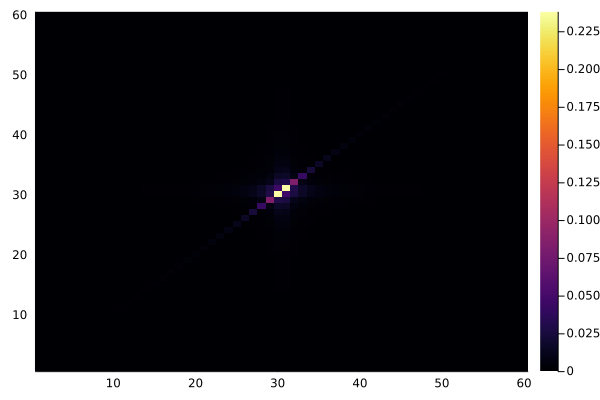

In [9]:
heatmap(real.(χDMFTsp[:,:,21]))

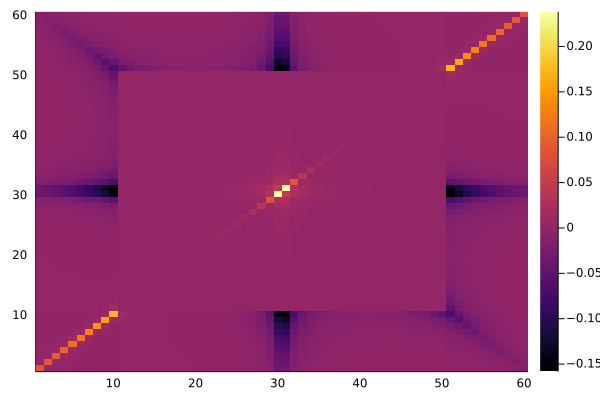

In [10]:
heatmap(real.(χDMFTsp_impr[:,:,21]))